## Descriptive Statistics and Data Exploration

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns',200)

In [2]:
filename = 'C:\Data\\titanic\\titanic.xlsx'
df = pd.read_excel(filename)
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [52]:
def get_data_shape(cdf):
    status = f'The datset has {cdf.shape[0]} rows and {cdf.shape[1]} columns' 
    return status

def get_columns(cdf):
    column_number = 0
    status = 'The Datase has columns:\n'
    for col in cdf.columns:
        column_number += 1 
        status = status + f'\tcolumn#{column_number} {col} \n'
    return status

def get_dtypes(cdf):
    dtypes = cdf.dtypes
    return dtypes



In [59]:
# df.shape
print(get_data_shape(df))
# print(df.describe)
# print(get_columns(df))
print(get_dtypes(df))
# result = df.dtypes
# print(result)

The datset has 1309 rows and 14 columns


TypeError: can only concatenate str (not "numpy.dtype[int64]") to str

In [43]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
pivot = df.pivot_table(index =['pclass','sex'],
                       values =['survived'],
                       aggfunc ='sum',margins=True)
print(pivot)

               survived
pclass sex             
1      female       139
       male          61
2      female        94
       male          25
3      female       106
       male          75
All                 500


In [21]:
index_col1 = 'pclass'
index_col2 = 'sex'
value_col1 = 'survived'
pivot = df.pivot_table(index =['pclass','sex'],
                       values =['survived'],
                       aggfunc ='sum',margins=True, margins_name='Grand Total')
print(pivot)

                    survived
pclass      sex             
1           female       139
            male          61
2           female        94
            male          25
3           female       106
            male          75
Grand Total              500


In [19]:
pivot = df.pivot_table(index =['pclass','sex'],
                       values =['survived'],
                       aggfunc ='sum')
print(pivot)

               survived
pclass sex             
1      female       139
       male          61
2      female        94
       male          25
3      female       106
       male          75


In [10]:
df.describe

<bound method NDFrame.describe of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin em

data	It is the DataFrame from which we want to remove the repeated data.
values	It represents the column to aggregate.
index	It is a column, grouper, array, or a list. It represents the data column that we want as index i.e as rows.
columns	It is a column, grouper, array, or a list. It represents the data column that we want as columns in our output pivot table.
aggfunc	It is a function, list of functions, or a dictionary. It represents the aggregate function that will be applied to the data. If a list of aggregate functions is passed then there will be a column for each aggregate function in the resultant table with the column name on the top.
fill_value	It is a scalar. It represents the value that will replace the missing values in the output table
margins	It is a boolean value. It represents the row and column generated after taking the sum of the respective row and column.
dropna	It is a boolean value. It eliminates the columns whose values are NaN from the output table.
margins_name	It is a string. It represents the name of the row and column generated if margins value is True.
observed	It is a boolean value. If any grouper is categorical then this parameter applies. If it is True, it shows the observed values for categorical groupers. If it is False, it shows all values for categorical groupers
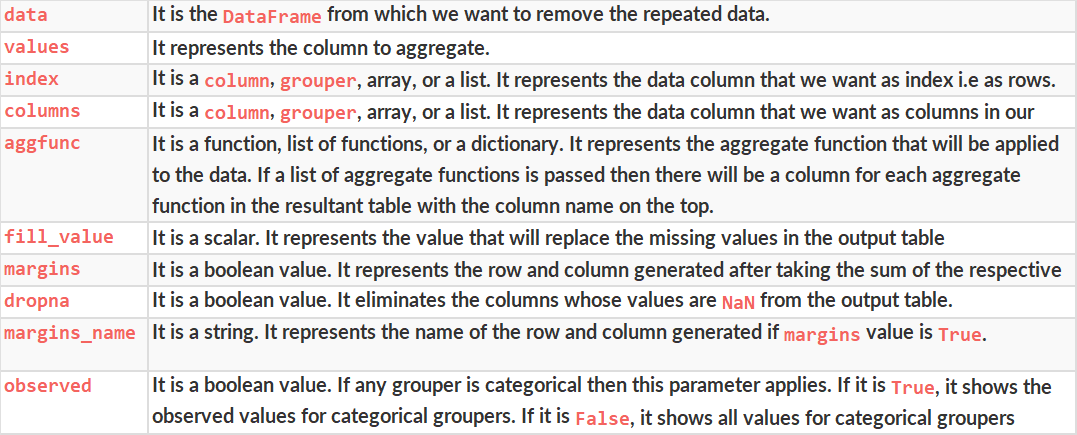